In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [39]:
data = pd.DataFrame()
data["x"] = [1, 2, 3, 4]
data["y"] = [9, 10, 16, 25]

In [40]:
model = LinearRegression()

model.fit(data[["x"]], data[["y"]])

pred = model.predict(data[["x"]])

r2_score(data["y"], pred)

0.9

In [41]:
model.intercept_

array([1.5])

In [42]:
model.coef_

array([[5.4]])

In [43]:
# x vs log(y)
new_x = data[["x"]]
new_y = np.log(data["y"])

model = LinearRegression()

model.fit(new_x, new_y)

pred = model.predict(new_x)

r2_score(new_y, pred)

0.9446640952395841

In [44]:
# y vs log(x)
new_x = np.log(data[["x"]])
new_y = data[["y"]]


model = LinearRegression()

model.fit(new_x, new_y)

pred = model.predict(new_x)

r2_score(new_y, pred)

0.7524064170496467

In [45]:
data

,x,y
0,1,9
1,2,10
2,3,16
3,4,25


In [46]:
data["x_2"] = data["x"]**2
data["x_3"] = data["x"]**3

In [47]:
# y vs log(x)
new_x = data[["x", "x_2"]]
new_y = data[["y"]]


model = LinearRegression()

model.fit(new_x, new_y)

pred = model.predict(new_x)

r2_score(new_y, pred)

0.9987654320987654

In [48]:
# y vs log(x)
new_x = data[["x", "x_2", "x_3"]]
new_y = data[["y"]]


model = LinearRegression()

model.fit(new_x, new_y)

pred = model.predict(new_x)

r2_score(new_y, pred)

1.0

In [49]:
model.intercept_ # c

array([15.])

In [50]:
model.coef_

array([[-10.16666667,   4.5       ,  -0.33333333]])

In [51]:
# y = -10.16666667 + 4.5 x^2 -0.33333333 x^3 +  15.000

In [52]:
import statsmodels.api as sm

new_x = data[["x", "x_2"]]
new_y = data[["y"]]

new_x_with_const = sm.add_constant(new_x)

SLR_model = sm.OLS(new_y, new_x_with_const).fit() # Ordinary Least Squares

print(SLR_model.summary())

"""
sklearn x, y
Stats
"""

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     404.5
Date:                Sun, 24 Aug 2025   Prob (F-statistic):             0.0351
Time:                        10:07:25   Log-Likelihood:                0.31571
No. Observations:                   4   AIC:                             5.369
Df Residuals:                       1   BIC:                             3.527
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5000      1.245      9.237      0.0

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


'\nsklearn x, y\nStats\n'

In [53]:
data["x_4"] = data["x"]

In [54]:
data

,x,y,x_2,x_3,x_4
0,1,9,1,1,1
1,2,10,4,8,2
2,3,16,9,27,3
3,4,25,16,64,4


In [55]:
data["x_4"] = data["x"]
new_x = data[["x", "x_4"]]
new_y = data[["y"]]

new_x_with_const = sm.add_constant(new_x)

SLR_model = sm.OLS(new_y, new_x_with_const).fit() # Ordinary Least Squares

print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sun, 24 Aug 2025   Prob (F-statistic):             0.0513
Time:                        10:07:25   Log-Likelihood:                -8.4732
No. Observations:                   4   AIC:                             20.95
Df Residuals:                       2   BIC:                             19.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5000      3.486      0.430      0.7

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [56]:
# H0: variavle is not importnant --> higher p supports H0
# H1: variable is important ---> lower p supports H1

In [57]:
cars = pd.read_csv("Car_MPG_Data.csv")
# cars.drop(columns=["HP"], inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VOL     82 non-null     int64  
 1   HP      82 non-null     int64  
 2   MPG     82 non-null     float64
 3   SP      82 non-null     int64  
 4   WT      82 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 3.3 KB


In [58]:
cars

,VOL,HP,MPG,SP,WT
0,89,49,65.4,96,17.5
1,92,55,56.0,97,20.0
2,92,55,55.9,97,20.0
3,92,70,49.0,105,20.0
4,92,53,46.5,96,20.0
...,...,...,...,...,...
77,50,322,18.1,165,45.0
78,115,238,17.2,140,45.0
79,50,263,17.0,147,45.0
80,119,295,16.7,157,45.0


In [59]:
cars.describe()

,VOL,HP,MPG,SP,WT
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,98.804878,117.134146,33.781707,112.414634,30.914634
std,22.166285,56.840857,10.004605,14.037825,8.141422
min,50.000000,49.000000,13.200000,90.000000,17.500000
25%,89.500000,84.000000,27.775000,105.000000,25.000000
50%,101.000000,99.000000,32.450000,109.000000,30.000000
75%,113.000000,140.000000,39.300000,114.750000,35.000000
max,160.000000,322.000000,65.400000,165.000000,55.000000


In [60]:
cars.corr()

,VOL,HP,MPG,SP,WT
VOL,1.000000,0.076479,-0.368614,-0.043062,0.384954
HP,0.076479,1.000000,-0.789856,0.966545,0.832220
MPG,-0.368614,-0.789856,1.000000,-0.688446,-0.905085
SP,-0.043062,0.966545,-0.688446,1.000000,0.678534
WT,0.384954,0.832220,-0.905085,0.678534,1.000000


In [61]:
cars[["SP", "WT"]].corr()

,SP,WT
SP,1.000000,0.678534
WT,0.678534,1.000000


In [62]:
new_x = cars[["VOL", "SP", "WT"]]
new_y = cars["MPG"]

new_x_with_const = sm.add_constant(new_x)

SLR_model = sm.OLS(new_y, new_x_with_const).fit() # Ordinary Least Squares

print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           1.94e-30
Time:                        10:07:26   Log-Likelihood:                -230.80
No. Observations:                  82   AIC:                             469.6
Df Residuals:                      78   BIC:                             479.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.1830      5.123     15.845      0.0

In [63]:
# independant variables are inter dependent

# MPG = -0.1801 * VOL  - 0.5029*SP + 108.1077

-0.0412 * 107 -0.1348*130 -0.9113*55 + 81.1830

9.129100000000008

In [64]:
# Detection of multicorl

'''
1.  Consider only independent variavle (Use corr)
2.  
'''

'\n1.  Consider only independent variavle (Use corr)\n2.  \n'

In [65]:
for col in ["VOL", "SP", "WT"]:
  features = list(set(["VOL", "SP", "WT"]) - set([col]))
  new_x = cars[features]
  new_y = cars[col]

  model = LinearRegression()

  model.fit(new_x, new_y)

  pred = model.predict(new_x)

  print(col, "vs", features, r2_score(new_y, pred))


VOL vs ['SP', 'WT'] 0.319760852239536
SP vs ['VOL', 'WT'] 0.5690924666564996
WT vs ['VOL', 'SP'] 0.6322666363266174


In [66]:
1/(1-0.63)

2.7027027027027026

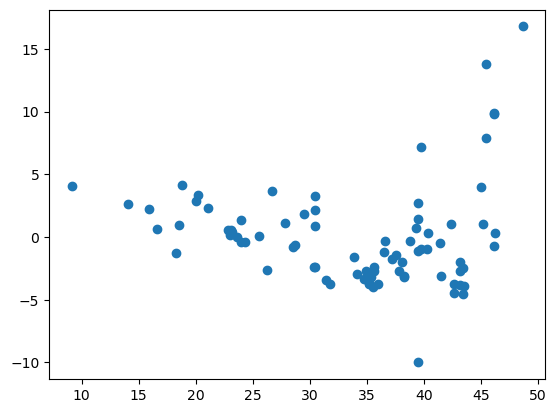

In [80]:
plt.scatter(SLR_model.predict(), SLR_model.resid)

# what is durbin watson?
The Durbin-Watson statistic tests for autocorrelation in the residuals of a regression model.

- Range: 0 to 4
- Value ≈ 2: No autocorrelation
- Value < 2: Positive autocorrelation (residuals are similar to each other)
- Value > 2: Negative autocorrelation (residuals alternate in sign)


#### In summary:
Durbin-Watson helps you check if your residuals are independent. Values far from 2 suggest that your model’s errors are not random, which can affect the reliability of your regression results.

In [81]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['f-value', 'p-value']
test = sms.het_breuschpagan(SLR_model.resid, SLR_model.model.exog)
lzip(name, test[2:])

[('f-value', np.float64(4.298485778042909)),
 ('p-value', np.float64(0.007351666976631653))]